In [1]:
import pandas as pd
import numpy as np
import numpy as np

Recurrent Neural Networks (RNN)
type de neuronne plus éfficace sur les données de texte de type de NLP

##Exploration du dataSet

In [6]:
# df = pd.read_csv(folder + "training.1600000.processed.noemoticon.csv", encoding="latin", header=None)
df = pd.read_csv('/content/drive/MyDrive/Classroom/EPSI DATAVIZ/training.1600000.processed.noemoticon.csv', encoding="latin", header=None)

In [7]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = df.iloc[:,[0, 5]]

In [9]:
df.shape

(1600000, 2)

In [10]:
df.columns = ['sentiment', 'tweet']

In [11]:
df['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [12]:
sents ={0:"negatif",4:"positif"}

In [13]:
#pas besoin de creer un fction
def change_label(label):
  return sents[label]

In [14]:
df['sentiment'] = df['sentiment'].replace(sents)

In [15]:
df['sentiment'].value_counts()

negatif    800000
positif    800000
Name: sentiment, dtype: int64

In [16]:
#aleatoire
df.sample(10)

,sentiment,tweet
842137,positif,@SUPREMESMITH very welcome indeed.
1087873,positif,"went to the mountains tonight, just got home. ..."
1448739,positif,:O so everyone gets to hear how good mister pr...
1231064,positif,"Whew another weekend flew by, the schedule is ..."
766159,negatif,@jennyfranz I was feeling pretty bad yesterday...
492500,negatif,@atomicmufin wish i could I'm all out.. I wan...
584568,negatif,a lido' tired -_- graduation tomorrow yaay . ...
1261786,positif,New clothes
898208,positif,@Silversmyth oh i know...my gf is my number 1 ...
1163393,positif,just gOt bacK from churcH.. haha


In [17]:
df['tweet'][783335]

"@jiblog Everything worked just fine till yesterday. Haven't changed a thing, started it this morning, and no 3rd party app works... "

##Preprocessing

Nettoyer tout ce qui est lien

In [18]:
#re Opérations à base d'expressions rationnelle
import re

In [19]:
import nltk

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [22]:
#on emporte les stopwords de l'anglais
english_stopwords = stopwords.words('english')

In [25]:
stemmer = SnowballStemmer('english')

In [26]:
stemmer.stem('potatoes')

'potato'

In [27]:
#trout ces mots seront supprimées
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
#expression reguliere destiné aux nettoyages
text_cleaning_regex = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]+"

In [29]:
def preprocess(text):
  #on a enlevé les mentions, les liens et ceux qui n'est pas alphanumérique
  text_cleaning_regex = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]+"
  text = re.sub(text_cleaning_regex, " ", str(text).lower().strip())

  tokens = []
  #stowords
  for word in text.split(" "):
    if word not in english_stopwords:
      word_stem = stemmer.stem(word)
      tokens.append(word_stem)

  cleaned_text = " ".join(tokens).strip()


  return cleaned_text

In [30]:
preprocess("Im Rosey Listher @https://filmoflix.to/film/thriller/458-la-fille-du-train.html, I need to have a conversation with Mouhoumounou about my futur & the futur of my @children")

'im rosey listher   need convers mouhoumounou futur futur children'

In [31]:
df['text'] = df['tweet'].apply(preprocess)

In [32]:
df.head()

,sentiment,tweet,text
0,negatif,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr third day
1,negatif,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,negatif,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save 50 rest go bound
3,negatif,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,negatif,"@nationwideclass no, it's not behaving at all....",behav mad see


##Train Test Split
les tokeniser ne s'entrainent pas sur les données de test

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train_data,test_data = train_test_split(df, test_size=0.2,stratify=df['sentiment'],random_state=42)

In [35]:
#Un fction qui calcule la taille des phrases pour voir le minimum
def length(text):
  return len(text.split(' '))

In [36]:
df['len'] = df['text'].apply(length)

In [37]:
df['len'].describe()

count    1.600000e+06
mean     7.229460e+00
std      4.053380e+00
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.000000e+01
max      5.000000e+01
Name: len, dtype: float64

In [38]:
df['len'].min(), df['len'].max(), df['len'].mean(), df['len'].median()

(1, 50, 7.22946, 7.0)

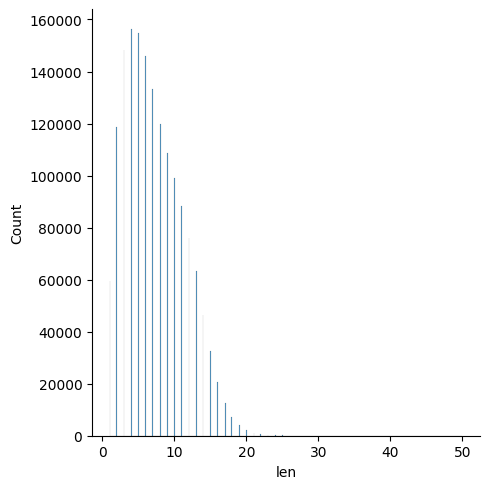

In [39]:
#
import seaborn as sns
sns.displot(df['len'])

##Tokenisation

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
#on ne connait pas le vocab_size, il faut entrainer le tokenizer pour ensuite d2finir le vocab_size
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['text'])

In [42]:
word_index = tokenizer.word_index
len(word_index)

248676

In [43]:
vocab_size = 70000
maxlen = 15
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['text'])
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train_data['text'])
training_padded = pad_sequences(training_sequences, padding="post", maxlen=maxlen, truncating="post")
test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_padded = pad_sequences(test_sequences, padding="post", maxlen=15, truncating="post")

In [44]:
training_padded

array([[  13,    3,  297, ...,  902,    0,    0],
       [ 578,  333,  149, ...,    0,    0,    0],
       [  49,  418,   21, ...,    0,    0,    0],
       ...,
       [  48,   12,   36, ...,    0,    0,    0],
       [ 447,   33,  564, ..., 3814,  277,  385],
       [ 212,   28,  774, ...,    0,    0,    0]], dtype=int32)

##Label Encoder

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
#creation de l'encoder et de son instanciation puis transformation du negatif en ) et positif en 1
encoder = LabelEncoder()
training_labels = encoder.fit_transform(train_data['sentiment'])

In [47]:
training_labels

array([1, 0, 0, ..., 1, 0, 1])

In [48]:
test_labels = encoder.transform(test_data['sentiment'])

In [51]:
training_labels.shape

(1280000,)

In [53]:
training_labels = training_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

##Modeling

In [54]:
import tensorflow as tf

In [55]:
#la dimenion du embending est la racine 4eme du vocab_size
np.power(70000, 1/4)

16.26576561697786

In [56]:
embedding_dim = 16
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)
h = model.fit(training_padded, training_labels, epochs=50, batch_size=2048,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 18s 28ms/step - loss: 0.5567 - accuracy: 0.7326 - val_loss: 0.4888 - val_accuracy: 0.7714
Epoch 2/50
  3/625 [..............................] - ETA: 20s - loss: 0.4788 - accuracy: 0.7850

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 18s 30ms/step - loss: 0.4755 - accuracy: 0.7773 - val_loss: 0.4766 - val_accuracy: 0.7738
Epoch 3/50
625/625 [==============================] - 19s 30ms/step - loss: 0.4623 - accuracy: 0.7831 - val_loss: 0.4716 - val_accuracy: 0.7761
Epoch 4/50
625/625 [==============================] - 18s 28ms/step - loss: 0.4541 - accuracy: 0.7869 - val_loss: 0.4700 - val_accuracy: 0.7759
Epoch 5/50
625/625 [==============================] - 17s 28ms/step - loss: 0.4480 - accuracy: 0.7899 - val_loss: 0.4697 - val_accuracy: 0.7758
Epoch 6/50
625/625 [==============================] - 18s 28ms/step - loss: 0.4429 - accuracy: 0.7923 - val_loss: 0.4707 - val_accuracy: 0.7762
Epoch 7/50
625/625 [==============================] - 18s 29ms/step - loss: 0.4385 - accuracy: 0.7945 - val_loss: 0.4721 - val_accuracy: 0.7756
Epoch 8/50
625/625 [==============================] - 17s 27ms/step - loss: 0.4343 - accuracy: 0.7965 - val_loss: 0.4742 - val_accuracy: 0.7747
Epo

In [57]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

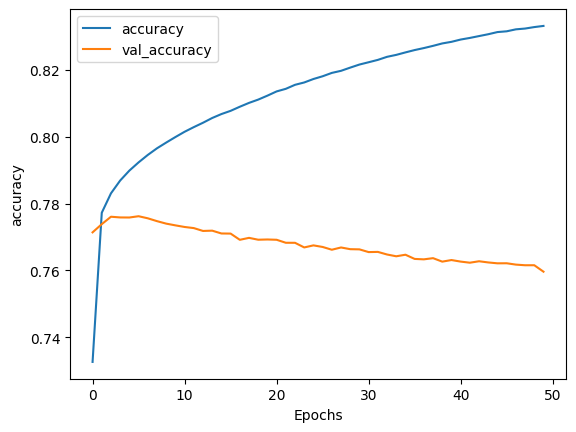

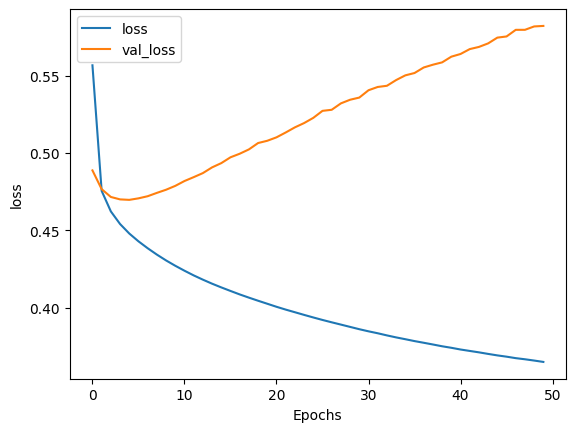

In [58]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

##Recurrent Neural Network(réseau de neurones récurrents)

C'est le premier algorithme qui se souvient de son entrée, en raison d'une mémoire interne, ce qui le rend parfaitement adapté aux problèmes de Machine Learning qui impliquent des données séquentielles

In [59]:
embedding_dim = 16
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.SimpleRNN(10),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          1120000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                270       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1120367 (4.27 MB)
Trainable params: 1120367 (4.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
h = model.fit(training_padded, training_labels, epochs=50, batch_size=2048,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 35s 50ms/step - loss: 0.5224 - accuracy: 0.7413 - val_loss: 0.4831 - val_accuracy: 0.7738
Epoch 2/50
625/625 [==============================] - 26s 42ms/step - loss: 0.4636 - accuracy: 0.7851 - val_loss: 0.4807 - val_accuracy: 0.7731
Epoch 3/50
625/625 [==============================] - 27s 44ms/step - loss: 0.4458 - accuracy: 0.7938 - val_loss: 0.4828 - val_accuracy: 0.7720
Epoch 4/50
625/625 [==============================] - 28s 46ms/step - loss: 0.4316 - accuracy: 0.8008 - val_loss: 0.4867 - val_accuracy: 0.7710
Epoch 5/50
625/625 [==============================] - 26s 41ms/step - loss: 0.4195 - accuracy: 0.8074 - val_loss: 0.4918 - val_accuracy: 0.7690
Epoch 6/50
625/625 [==============================] - 28s 44ms/step - loss: 0.4086 - accuracy: 0.8134 - val_loss: 0.4980 - val_accuracy: 0.7668
Epoch 7/50
625/625 [==============================] - 26s 42ms/step - loss: 0.3993 - accuracy: 0.8186 - val_loss: 0.5049 - val_accuracy:

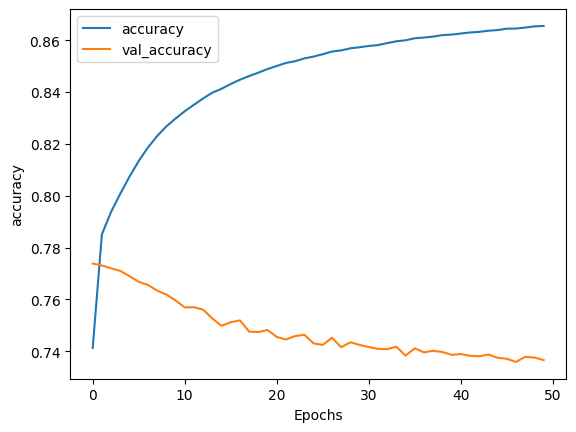

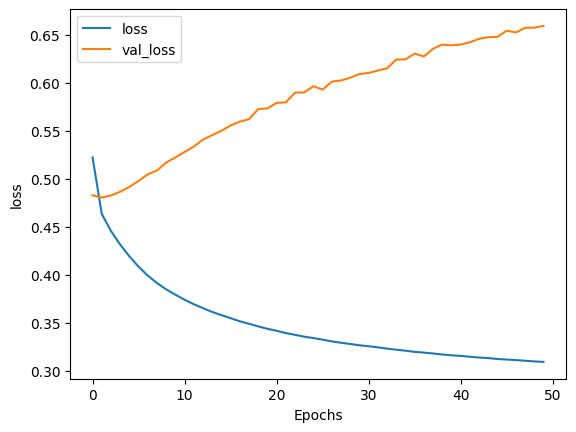

In [62]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

##LSTM

Le LSTM (Long Short-Term Memory)
Le principe de fonctionnement est le suivant : le LSTM apprend ce qu'il faut stocker dans l'état à long terme, ce qui peut être oublié par le réseau et ce qu'il faut y lire.

In [63]:
adam = tf.keras.optimizers.Adam()

In [64]:
embedding_dim = 16
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, embedding_dim),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True, dropout=0.25)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          1120000   
                                                                 
 bidirectional (Bidirection  (None, None, 32)          4224      
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 32)                6272      
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1130769 (4.31 MB)
Trainable params: 1130

In [67]:

h = model.fit(training_padded, training_labels, epochs=50, batch_size=2048,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 224s 337ms/step - loss: 0.5061 - accuracy: 0.7456 - val_loss: 0.4668 - val_accuracy: 0.7768
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 172s 275ms/step - loss: 0.4560 - accuracy: 0.7831 - val_loss: 0.4626 - val_accuracy: 0.7790
Epoch 3/50
625/625 [==============================] - 177s 283ms/step - loss: 0.4441 - accuracy: 0.7889 - val_loss: 0.4644 - val_accuracy: 0.7798
Epoch 4/50
625/625 [==============================] - 180s 288ms/step - loss: 0.4353 - accuracy: 0.7931 - val_loss: 0.4692 - val_accuracy: 0.7777
Epoch 5/50
625/625 [==============================] - 175s 280ms/step - loss: 0.4289 - accuracy: 0.7958 - val_loss: 0.4711 - val_accuracy: 0.7791
Epoch 6/50
625/625 [==============================] - 174s 278ms/step - loss: 0.4227 - accuracy: 0.7987 - val_loss: 0.4764 - val_accuracy: 0.7788
Epoch 7/50
625/625 [==============================] - 175s 281ms/step - loss: 0.4170 - accuracy: 0.8017 - val_loss: 0.4827 - val_accuracy: 0.7782
Epoch 8/50
625/625 [==============================] - 175s 280ms/step - loss: 0.4113 - accuracy: 0.8043 - val_loss: 0.4910 - val_accura

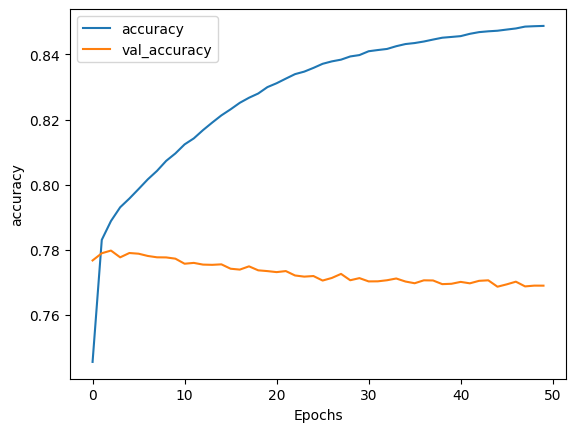

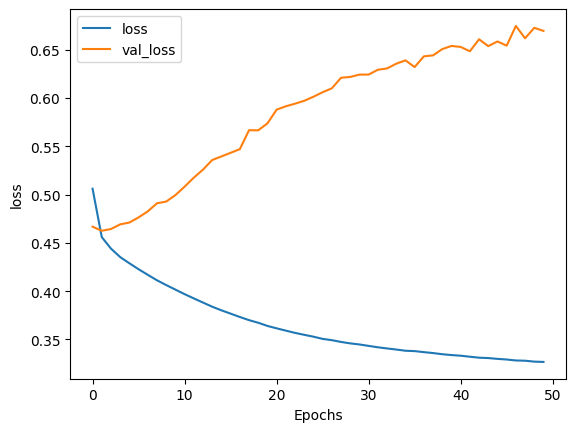

In [77]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")

##Transfert Learning

In [95]:
glove_file =  "/content/sample_data/glove.twitter.27B.50d.txt"

In [96]:
glove_file

'/content/sample_data/glove.twitter.27B.50d.txt'

In [97]:
glove_embeddings = {}

In [98]:
with open(glove_file) as f:
  for line in f:

    values = line.split(" ")
    word = values[0]
    vector = np.asarray(values[1:], dtype="float32")
    glove_embeddings[word] = vector

In [99]:
glove_embeddings

{'<user>': array([ 0.78704 ,  0.72151 ,  0.29148 , -0.056527,  0.31683 ,  0.47172 ,
         0.023461,  0.69568 ,  0.20782 ,  0.60985 , -0.22386 ,  0.7481  ,
        -2.6208  ,  0.20117 , -0.48104 ,  0.12897 ,  0.035239, -0.24486 ,
        -0.36088 ,  0.026686,  0.28978 , -0.10698 , -0.34621 ,  0.021053,
         0.54514 , -1.0958  , -0.274   ,  0.2233  ,  1.0827  , -0.029018,
        -0.84029 ,  0.58619 , -0.36511 ,  0.34016 ,  0.89615 ,  0.32757 ,
         0.24267 ,  0.68404 , -0.34374 ,  0.13583 , -2.2162  , -0.42537 ,
         0.46157 ,  0.88626 , -0.22014 ,  0.025599, -0.38615 ,  0.080107,
        -0.075323, -0.61461 ], dtype=float32),
 '.': array([ 0.68661 , -1.0772  ,  0.011114, -0.24075 , -0.3422  ,  0.64456 ,
         0.54957 ,  0.30411 , -0.54682 ,  1.4695  ,  0.43648 , -0.34223 ,
        -2.7189  ,  0.46021 ,  0.016881,  0.13953 ,  0.020913,  0.050963,
        -0.48108 , -1.0764  , -0.16807 , -0.014315, -0.55055 ,  0.67823 ,
         0.24359 , -1.3179  , -0.036348, -0.228   

In [100]:
glove_embeddings['the']

array([ 2.5320e-01, -1.4884e-02,  5.9371e-01,  1.5902e-01,  1.2754e-01,
        2.2428e-01,  8.9421e-01,  3.6396e-01, -3.1339e-01, -5.1857e-01,
        2.9637e-01, -4.1098e-02, -6.4555e+00,  3.2260e-01,  3.7280e-01,
       -6.1690e-01,  4.6744e-01,  5.0600e-01,  3.1950e-02,  1.0155e-01,
       -1.9615e-01,  1.3364e-01, -2.7140e-01, -4.1728e-01,  7.7940e-03,
        1.3573e-01, -7.2992e-02,  2.5208e-01,  5.1148e-01,  1.5120e-01,
        8.4398e-02, -2.4791e-01, -1.5913e-01,  1.5005e-01,  7.7243e-01,
        3.6632e-01, -9.8310e-02, -6.4317e-02, -7.1983e-04, -1.5231e-01,
       -1.4604e+00, -3.1696e-01, -4.1762e-01,  7.3363e-02,  3.2043e-01,
        3.4324e-01,  1.0895e-02, -2.8932e-01,  4.5493e-01,  1.8659e-01],
      dtype=float32)

In [101]:
embedding_matrix = np.zeros((vocab_size, 50))

In [102]:
for word, i in word_index.items():
  if i > vocab_size -1:
    break
  embedding_vector = glove_embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [103]:
embedding_dim = 16
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size, 50, weights=[embedding_matrix], trainable=False),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True, dropout=0.25)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True)

In [104]:
h = model.fit(training_padded, training_labels, epochs=50, batch_size=2048,
              validation_data=(test_padded, test_labels),
              callbacks=[model_ckp])

Epoch 1/50
625/625 [==============================] - 233s 341ms/step - loss: 0.5699 - accuracy: 0.6961 - val_loss: 0.5202 - val_accuracy: 0.7378
Epoch 2/50
625/625 [==============================] - 208s 333ms/step - loss: 0.5325 - accuracy: 0.7282 - val_loss: 0.5087 - val_accuracy: 0.7457
Epoch 3/50
625/625 [==============================] - 198s 317ms/step - loss: 0.5235 - accuracy: 0.7353 - val_loss: 0.5020 - val_accuracy: 0.7508
Epoch 4/50
625/625 [==============================] - 207s 331ms/step - loss: 0.5185 - accuracy: 0.7384 - val_loss: 0.4981 - val_accuracy: 0.7534
Epoch 5/50
625/625 [==============================] - 209s 335ms/step - loss: 0.5149 - accuracy: 0.7412 - val_loss: 0.4960 - val_accuracy: 0.7549
Epoch 6/50
625/625 [==============================] - 205s 328ms/step - loss: 0.5124 - accuracy: 0.7431 - val_loss: 0.4933 - val_accuracy: 0.7566
Epoch 7/50
625/625 [==============================] - 212s 340ms/step - loss: 0.5102 - accuracy: 0.7447 - val_loss: 0.4912 -

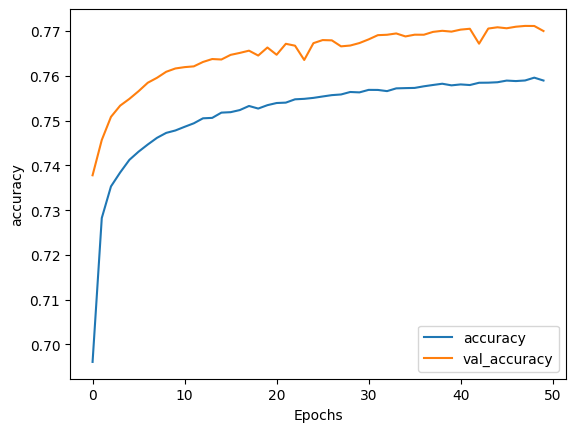

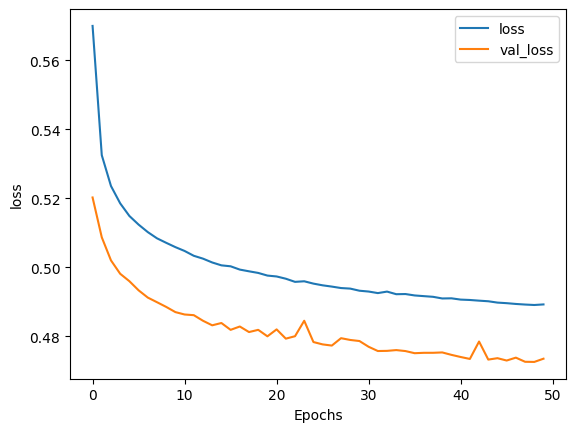

In [105]:
plot_graphs(h, 'accuracy')
plot_graphs(h, "loss")